# Result analysis

## Imports and data loading

In [2]:
import xarray as xr
# import glob
# import datetime

# import geopandas as gpd
import matplotlib.pyplot as plt
# from shapely.geometry import Point
import numpy as np

# from google.cloud import storage
# import gcsfs
# import zarr

import xskillscore as xs
# import pandas as pd

# import os

# import re
import skill_metrics as sm

# import matplotlib.lines as mlines

In [11]:
results = xr.open_dataset('/home/koenr/thesis_code/results_2022_ws_gcshifted_mesohourly15pdt_gc_pangu_ERA5_ens_rain_wd.nc')


## Taylor diagrams

### Taylor functions

In [12]:
# Function to calculate statistics
def calculate_taylor_statistics(data, reference_data):
    std = data.std(dim=['time', 'station'])
    ccoef = xr.corr(data, reference_data, dim=['time', 'station'])
    crmsd = np.sqrt(((data - reference_data)**2).mean(dim=['time', 'station']))
    return std, ccoef, crmsd

# General function to create subplots for various lead times
def plot_taylor_diagrams_for_lead_times(lead_times, variable, results):
    # Create a grid of subplots (2 rows, 2 columns for 4 lead times)
    fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharey=True)
    
    # Flatten the axes array for easier indexing
    axs = axs.flatten()

    # Loop through each lead time and create a Taylor diagram
    for i, lead_time in enumerate(lead_times):
        # Select the desired lead time
        results_selected = results.sel(prediction_timedelta=lead_time)
        
        # Select the desired variable
        results_variable = results_selected[[f'{variable}_hres', f'{variable}_gc', f'{variable}_pangu', f'{variable}_ERA5', f'{variable}_ens', 
                                             f'{variable}_analysis', f'{variable}_meso', f'{variable}_synop']]
        
        # Define suffixes for models and observation
        suffixes = ['hres', 'gc', 'analysis', 'meso', 'pangu', 'ERA5', 'ens', 'synop']

        # Calculate statistics
        std, ccoef, crmsd = {}, {}, {}
        for suffix in suffixes:
            std[suffix], ccoef[suffix], crmsd[suffix] = calculate_taylor_statistics(
                results_variable[f'{variable}_{suffix}'], results_variable[f'{variable}_synop']
            )
                    
        # Reorder suffixes so that observation is first
        suffixes = ['synop', 'gc', 'pangu', 'ERA5', 'meso', 'analysis','ens', 'hres' ]

        # Create arrays for statistics
        std_array = np.array([std[suffix].values for suffix in suffixes])
        ccoef_array = np.array([ccoef[suffix].values for suffix in suffixes])
        crmsd_array = np.array([crmsd[suffix].values for suffix in suffixes])

        # normalize the standard deviations with respect to the observation
        std_array = std_array/std_array[0]

        # Set the current subplot to plot on using plt.sca()
        # plt.sca(axs[i])
        plt.subplot(2, 2, i + 1)  # Use i+1 because subplot indices are 1-based

        # Plot the Taylor diagram in the current subplot
        sm.taylor_diagram(
            std_array, crmsd_array, ccoef_array,
            styleOBS='--', colOBS='b', markerobs='o', titleOBS='SYNOP',
            markerLabel=suffixes, markerLegend='on', markerSize=5,
            colRMS='g', styleRMS=':', titleRMS='on',
            colSTD='grey', styleSTD='-.', titleSTD='on',
            colCOR='grey', styleCOR='--', titleCOR='on'
        )

        # Set the title for each subplot
        plt.title(f'{lead_time} lead time', pad=20)
    
    # Set the overall plot title
    fig.suptitle(f'Taylor Diagrams for {variable.capitalize()}', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


### Taylor plots creation

/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


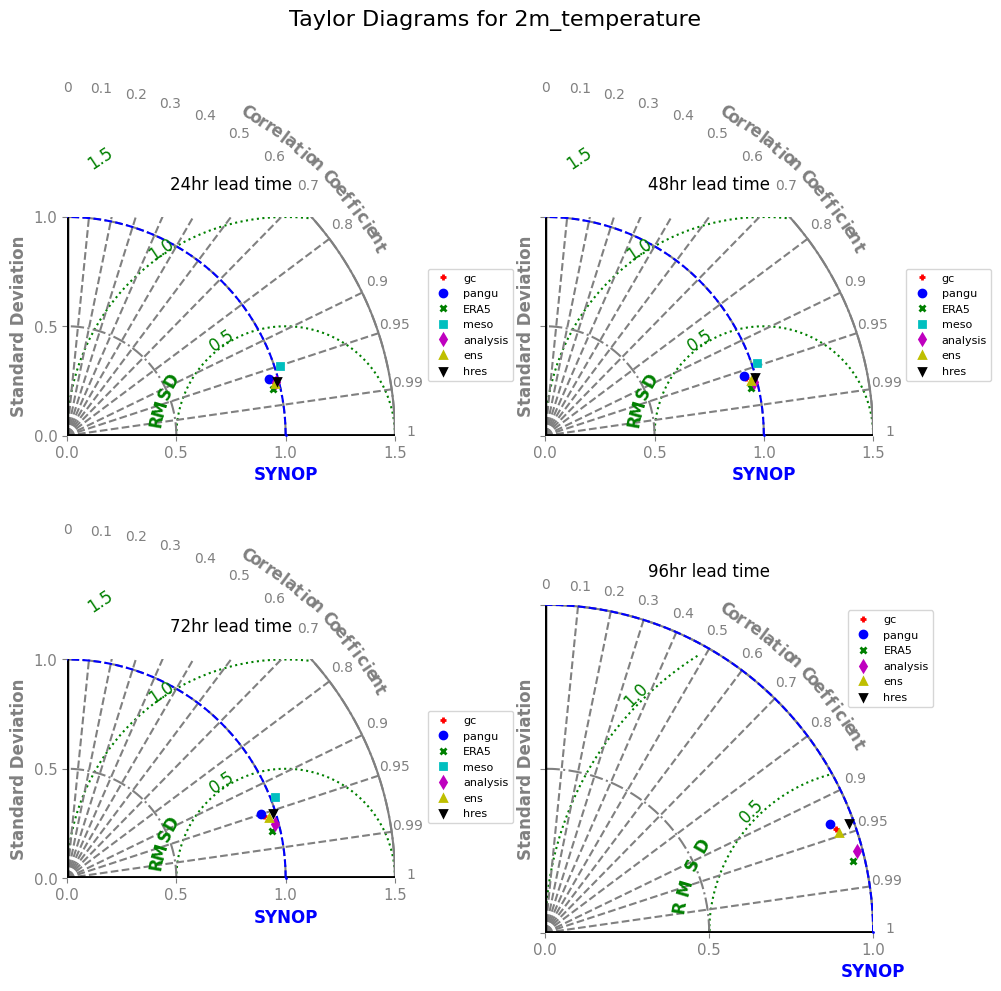

In [13]:
# Example usage for lead times and 2m temperature
lead_times = ['24hr', '48hr', '72hr', '96hr']
plot_taylor_diagrams_for_lead_times(lead_times, '2m_temperature', results)

/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


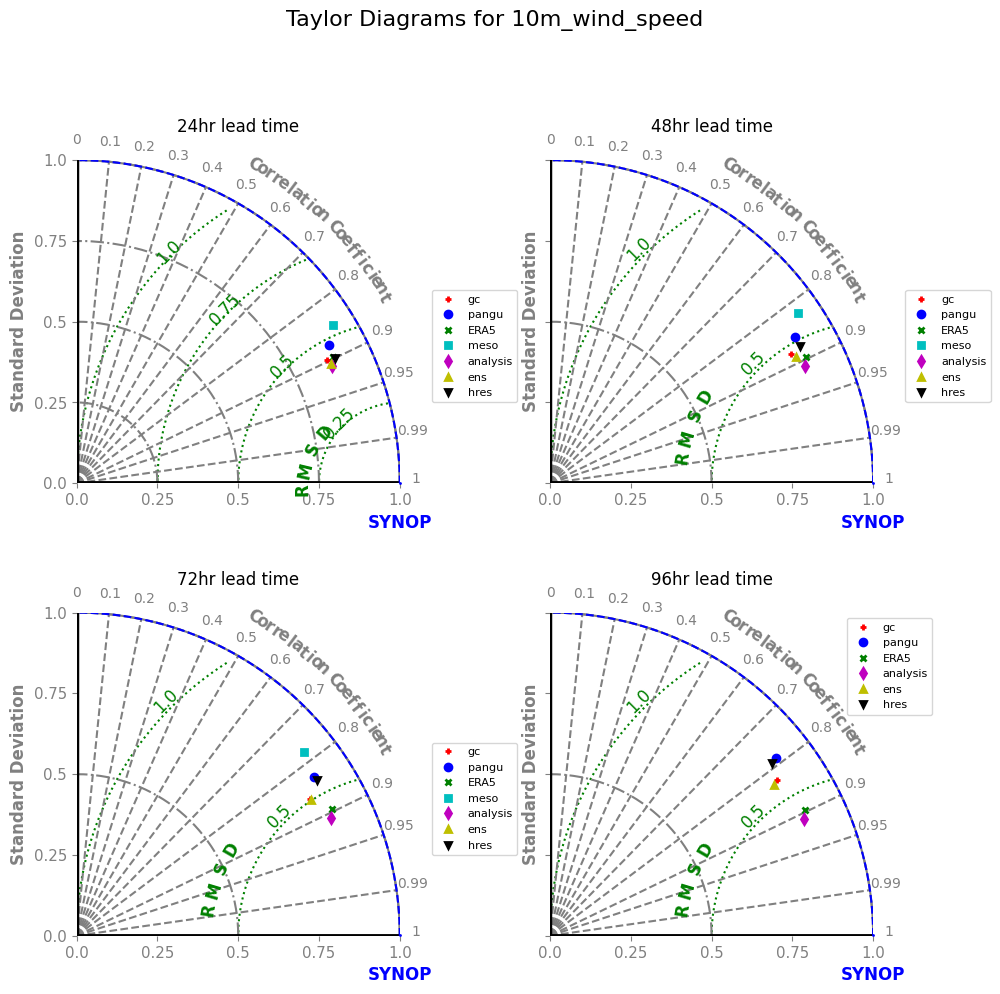

In [14]:
# Example usage for lead times and mean sea level pressure
lead_times = ['24hr', '48hr', '72hr', '96hr']
plot_taylor_diagrams_for_lead_times(lead_times, '10m_wind_speed', results)

/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: Run

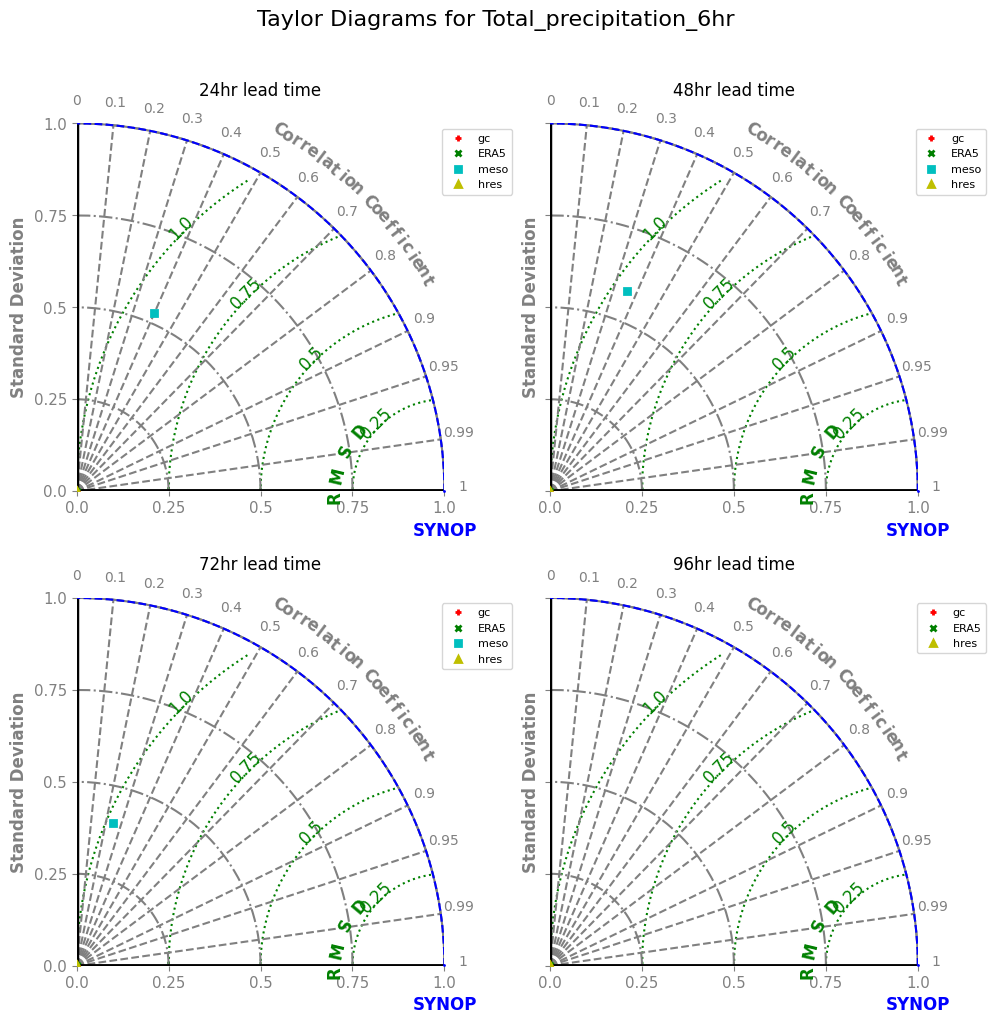

In [11]:
# Example usage for lead times and mean sea level pressure
lead_times = ['24hr', '48hr', '72hr', '96hr']
plot_taylor_diagrams_for_lead_times(lead_times, 'total_precipitation_6hr', results)

/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/skill_metrics/taylor_diagram.py:360: RuntimeWarning: invalid value encountered in arccos
  rho, theta = STDs, np.arccos(CORs)
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/skill_metrics/taylor_diagram.py:360: RuntimeWarning: invalid value encountered in arccos
  rho, theta = STDs, np.arccos(CORs)
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/koenr/thesis_code/virtualenvs/3_env/lib/python3.10/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  

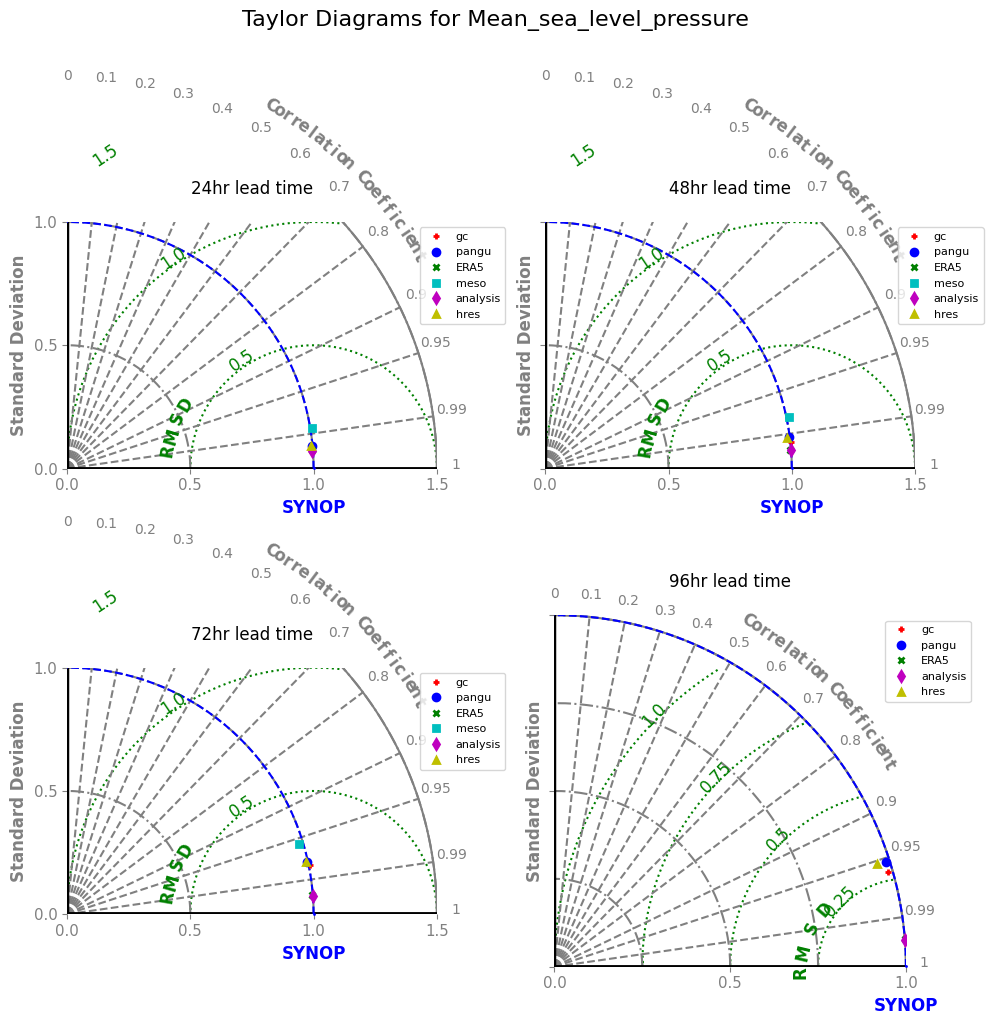

In [12]:
# Example usage for lead times and mean sea level pressure
lead_times = ['24hr', '48hr', '72hr', '96hr']
plot_taylor_diagrams_for_lead_times(lead_times, 'mean_sea_level_pressure', results)